**DOWNLOAD THE DATA SET**

In [1]:
!kaggle datasets download -d mejiaescobarchris/fer-stable-diffusion-dataset

Dataset URL: https://www.kaggle.com/datasets/mejiaescobarchris/fer-stable-diffusion-dataset
License(s): CC-BY-NC-SA-4.0
100% 3.17G/3.17G [02:32<00:00, 23.7MB/s]
100% 3.17G/3.17G [02:32<00:00, 22.3MB/s]


**UNZIP THE FILE**

In [2]:
from zipfile import ZipFile
file_name = "/content/fer-stable-diffusion-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


**IMPORT LIBRARIES**

In [3]:
import numpy as np
import cv2
# Import TensorFlow if you are using TensorFlow 2.x with Keras
import tensorflow as tf

# Use tf.keras instead of keras if using TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
# Import ImageDataGenerator from tf.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**TO DATA TEST & TRAIN**

In [4]:
train_dir = '/content/ARTIFICIAL-STABLE-DIFFUSION/TRAIN'
val_dir = '/content/ARTIFICIAL-STABLE-DIFFUSION/TEST'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 6605 images belonging to 7 classes.
Found 1680 images belonging to 7 classes.


**APPLY MODEL**

In [5]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**COMPILE THE MODEL**

In [6]:
# Compile the model with the updated optimizer parameters
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
)

# Continue training the model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/448 ━━━━━━━━━━━━━━━━━━━━ 3:48 662ms/step - accuracy: 0.2046 - loss: 1.9050

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 102s 197ms/step - accuracy: 0.2141 - loss: 1.8988 - val_accuracy: 0.1429 - val_loss: 1.9745
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 87s 184ms/step - accuracy: 0.2333 - loss: 1.8755 - val_accuracy: 0.1458 - val_loss: 1.9511
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 87s 182ms/step - accuracy: 0.2727 - loss: 1.8201 - val_accuracy: 0.2036 - val_loss: 1.9267
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 92s 192ms/step - accuracy: 0.3247 - loss: 1.7493 - val_accuracy: 0.2488 - val_loss: 1.8724
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 87s 183ms/step - accuracy: 0.3501 - loss: 1.6949 - val_accuracy: 0.2857 - val_loss: 1.8257
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 144s 190ms/step - accuracy: 0.3745 - loss: 1.6467 - val_accuracy: 0.2798 - val_loss: 1.8105
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 139s 182ms/step - accuracy: 0.4008 - loss: 1.5980 - val_accuracy: 0.3167 - val_loss: 1.7099
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 90s 190ms/step - accuracy: 0.4250 - loss: 1.5392 - 

**SAVE THE MODEL**

In [7]:
#Saving the model
emotion_model.save('model.h5')

In [8]:
from keras.models import load_model
emotion_model = load_model('model.h5')

**ANALYSIS THE IMAGE**

In [9]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [10]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**TAKE A PHOTO FORM USER**

In [23]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

**SHOW YOUR RESULT**

OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


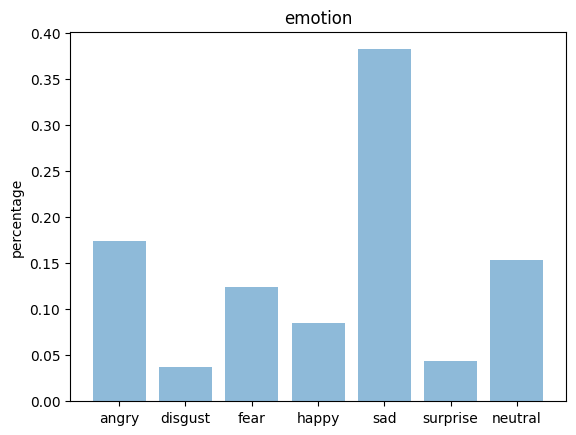

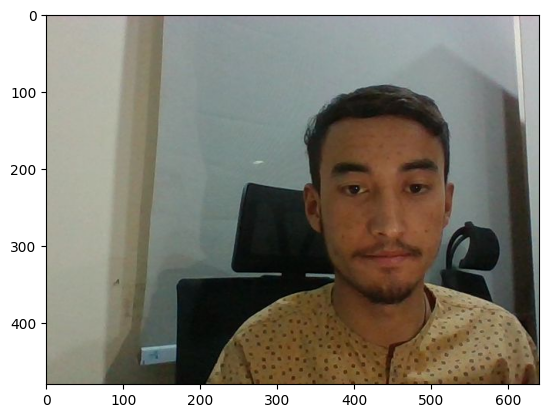

In [24]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




if __name__ == '__main__':
    facecrop('/content/WhatsApp Image 2024-10-19 at 4.19.12 AM.jpeg')

#Testing a file.

from keras.preprocessing import image
# Instead of importing ImageDataGenerator which is deprecated,
# use image_dataset_from_directory instead
from tensorflow.keras.utils import image_dataset_from_directory


import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Step 1: Get the ground truth and predictions for validation set
validation_generator.reset()  # Ensure no shuffling for evaluation
Y_pred = emotion_model.predict(validation_generator, validation_generator.samples // 64)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Step 2: Classification Report
print('Classification Report')
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(y_true, y_pred, target_names=target_names))

27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 659ms/step
Classification Report
              precision    recall  f1-score   support

       Angry       0.13      0.20      0.15       240
     Disgust       0.12      0.07      0.09       240
        Fear       0.12      0.11      0.12       240
       Happy       0.16      0.15      0.16       240
         Sad       0.14      0.17      0.15       240
    Surprise       0.15      0.20      0.17       240
     Neutral       0.12      0.05      0.07       240

    accuracy                           0.14      1680
   macro avg       0.13      0.14      0.13      1680
weighted avg       0.13      0.14      0.13      1680



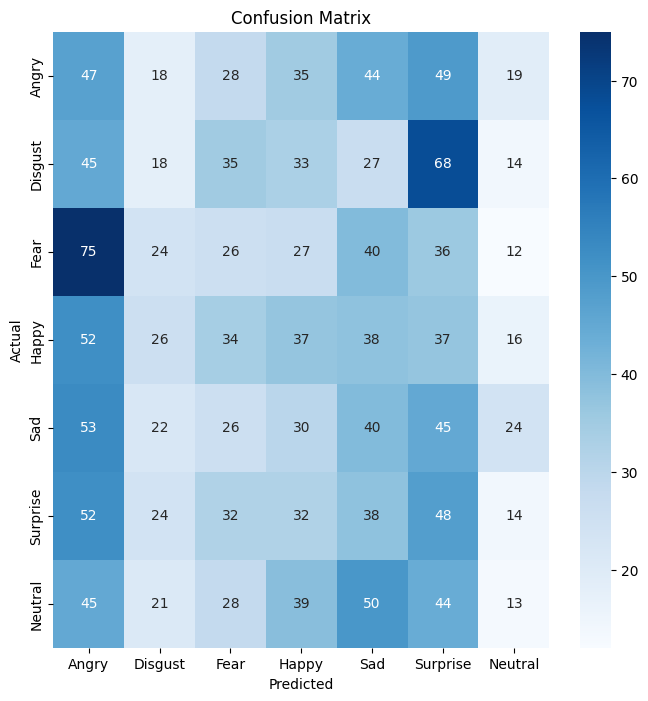

In [18]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Step 4: Evaluate the model on the test data (validation set)
loss, accuracy = emotion_model.evaluate(validation_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 645ms/step - accuracy: 0.4803 - loss: 1.3551
Test Loss: 1.3556008338928223
Test Accuracy: 0.4863095283508301


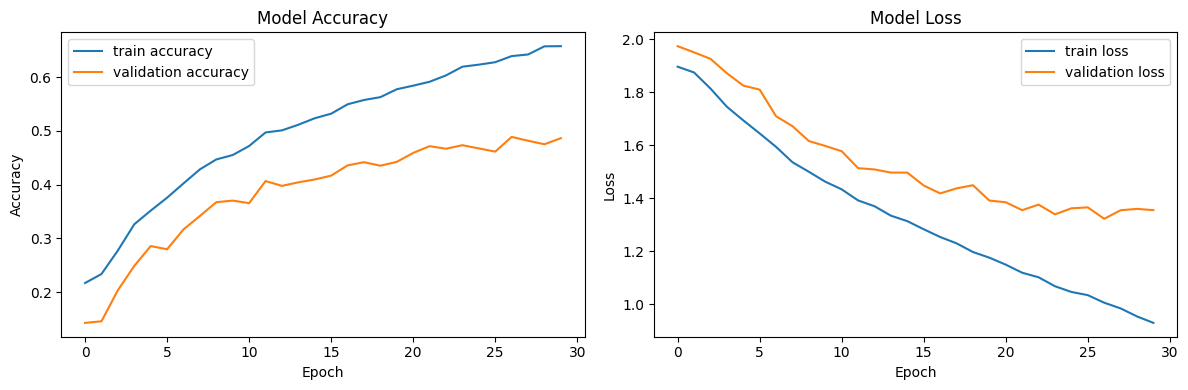

In [20]:
# Step 5: Plotting the training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(emotion_model_info.history['accuracy'], label='train accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(emotion_model_info.history['loss'], label='train loss')
plt.plot(emotion_model_info.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()